In [4]:
# Dinh Hoang Viet Phuong - 301123263

In [5]:
# import all necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [6]:
# I. Data Preprocessing:

In [7]:
# 1. Retrieve and load the MNIST dataset.

(X, y), (X_test_original, y_test_original) = mnist.load_data()

# Check the shape of the dataset
print("Training images shape:", X.shape)
print("Training labels shape:", y.shape)
print("Test images shape:", X_test_original.shape)
print("Test labels shape:", y_test_original.shape)

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [8]:
# 2. Split the dataset into 60,000 training samples and 10,000 testing samples using stratified sampling to ensure equal representation of each image class.

# Merge the originally separated training and test sets to create a full dataset
X_full = np.vstack([X, X_test_original])
y_full = np.hstack([y, y_test_original])

# Split the full dataset into training and test sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=10000, stratify=y_full, random_state=42
)

print("\nTraining distribution:")
print(np.bincount(y_train))
print("\nTest distribution:")
print(np.bincount(y_test))



Training distribution:
[5917 6752 5991 6121 5849 5411 5894 6251 5850 5964]

Test distribution:
[ 986 1125  999 1020  975  902  982 1042  975  994]


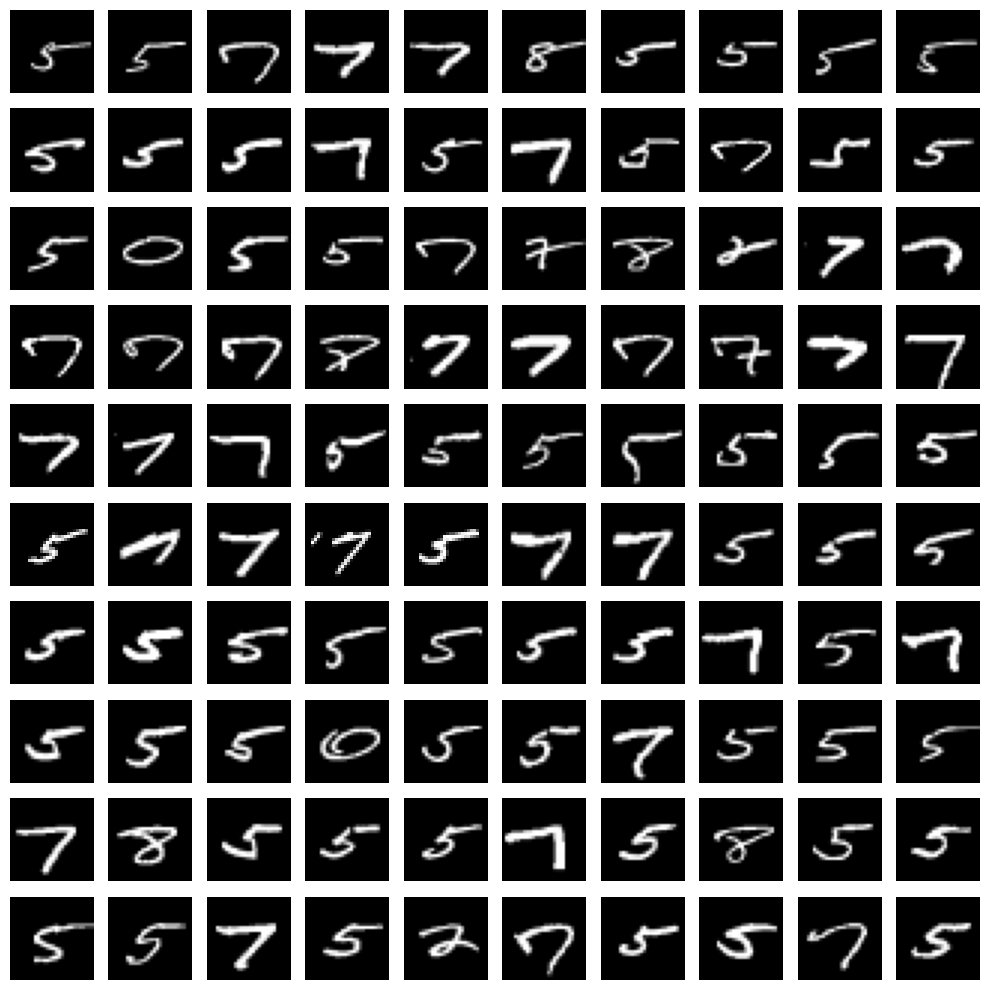

In [9]:
# 3. Display the unique images from the training set.

# Get unique images along with their indices and counts
unique_images, indices, counts = np.unique(X_train.reshape(X_train.shape[0], -1),
                                           axis=0,
                                           return_index=True,
                                           return_counts=True)

# Display unique images
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))
axes = axes.ravel()

n_unique = unique_images.shape[0]
# Displaying 100 unique images for visualization
for i in range(min(n_unique, 100)):
    axes[i].imshow(unique_images[i].reshape(28, 28), cmap='gray')
    axes[i].axis('off')

# Hide remaining subplots (if any)
for i in range(n_unique, 100):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [10]:
# Standardize the data so that each feature has a mean of 0 and a standard deviation of 1. [Hint- Reshape before scaling]

# Reshape the data
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

# Reshape the data back to its original shape
X_train_standardized = X_train_scaled.reshape(X_train.shape)
X_test_standardized = X_test_scaled.reshape(X_test.shape)

# Verify the results
print("Mean after standardization:", np.mean(X_train_standardized))
print("Standard deviation after standardization:", np.std(X_train_standardized))

Mean after standardization: 7.786666247541064e-19
Standard deviation after standardization: 0.9576491198422714


In [11]:
# II. Principal Component Analysis (PCA)

In [12]:
# 1. Apply PCA to the preprocessed data to reduce the dimensionality to 2

from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_reshaped)
X_test_pca = pca.transform(X_test_reshaped)

In [13]:
# 2. Determine the percentage of the total variance explained by each principal component. (Hint- explained variance ratio)

# Calculate and display the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

print("Explained variance by principal component:")
for i, var in enumerate(explained_variance_ratio, 1):
    print(f"Principal Component {i}: {var*100:.2f}%")

Explained variance by principal component:
Principal Component 1: 9.74%
Principal Component 2: 7.15%


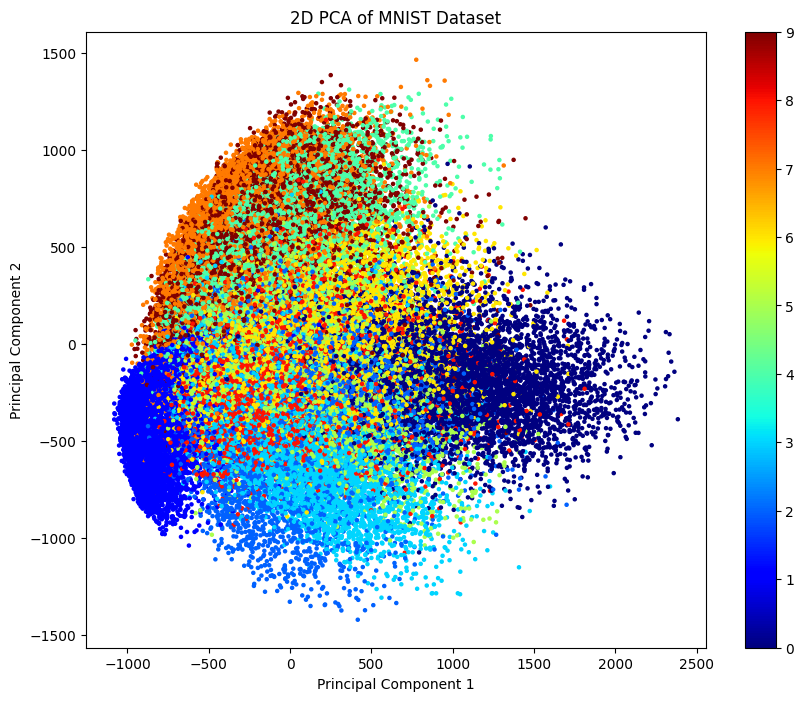

In [14]:
# 3. Visualize the data in the new 2-dimensional PCA space. (Plot the 2 principal components). Save the plot as MNIST Dataset after PCA with labels. Visualize the 2D projection

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='jet', s=5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.title('2D PCA of MNIST Dataset')
plt.show()

In [15]:
# III. Hierarchical Clustering

In [16]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

For k=2, silhouette score is 0.3582
For k=3, silhouette score is 0.4150
For k=4, silhouette score is 0.4039
For k=5, silhouette score is 0.3741
For k=6, silhouette score is 0.3662
For k=7, silhouette score is 0.3728
For k=8, silhouette score is 0.3574
For k=9, silhouette score is 0.3564


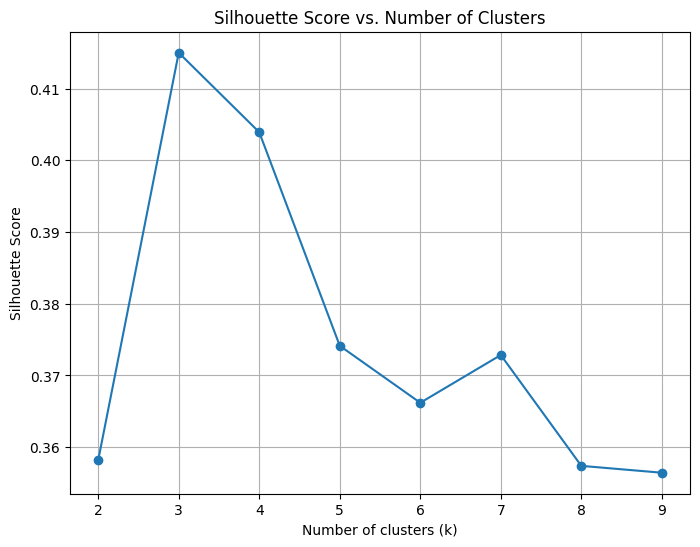

The optimal number of clusters is 3.


In [18]:
# 1. Use the silhouette score approach to choose the value of k (number of clusters)

# Define a range for k
k_values = range(2, 10)
silhouette_scores = []

# Compute silhouette scores for different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_label = kmeans.fit_predict(X_train_pca)
    silhouette_avg = silhouette_score(X_train_pca, cluster_label)
    silhouette_scores.append(silhouette_avg)
    print(f"For k={k}, silhouette score is {silhouette_avg:.4f}")

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.grid(True)
plt.show()

# Print the best k
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters is {best_k}.")

In [ ]:
# 2. Implement the Agglomerative Hierarchical Clustering algorithm to cluster the data into the selected number of clusters.
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.datasets import mnist

(X, y), (X_test_original, y_test_original) = mnist.load_data()
X_full = np.vstack([X, X_test_original])
y_full = np.hstack([y, y_test_original])
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=10000, stratify=y_full, random_state=42
)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_reshaped)


# Apply Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3) #k has found from step 2
agg_labels = agg_clustering.fit_predict(X_train_pca)

# Visualize the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=agg_labels, cmap='jet', s=5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=range(best_k))
plt.title(f'Agglomerative Hierarchical Clustering with 3 Clusters') #k has found from step 2
plt.show()

In [ ]:
# 3. Print the final cluster centroids Compute cluster centroids for Agglomerative Hierarchical Clustering

centroids = []

for cluster_num in range(best_k):
    # Get the indices of data points in the current cluster
    cluster_points = X_train_pca[agg_labels == cluster_num]

    # Calculate the centroid of the current cluster
    centroid = cluster_points.mean(axis=0)
    centroids.append(centroid)

centroids = np.array(centroids)

# Print the centroids
for i, centroid in enumerate(centroids, 1):
    print(f"Centroid of cluster {i}: {centroid}")

In [ ]:
# 4. Assign each data point to its corresponding cluster

# Group data points by their assigned cluster
clusters = {i: [] for i in range(best_k)}

for idx, label in enumerate(agg_labels):
    clusters[label].append(X_train_pca[idx])

# Optionally, print the number of data points in each cluster
for cluster, points in clusters.items():
    print(f"Cluster {cluster}: {len(points)} data points")


In [ ]:
# 5. Visualize the data points and cluster centroids in the PCA space [2D plot] & Save the plot

plt.figure(figsize=(10, 8))

# Plot data points colored by their cluster assignment
for cluster_num in range(best_k):
    cluster_points = X_train_pca[agg_labels == cluster_num]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=5, label=f"Cluster {cluster_num}")

# Plot cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Agglomerative Hierarchical Clustering with {best_k} Clusters')
plt.legend(loc="upper right")
plt.grid(True)

# Save the plot
filename = "cluster_visualization.png"
plt.savefig(filename, dpi=300)
plt.show()

print(f"Plot saved as {filename}")

In [ ]:
# IV. Analysis

In [ ]:
# 1. Based on the clustering result, describe any patterns or insights you
# observe in the data



In [ ]:
# 2. Discuss the effectiveness of using PCA before using Agglomerative
# Hierarchical Clustering for this dataset

